In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas
import nsfg
import thinkstats2
import math as mt
import thinkplot
import scipy

In [2]:
resp=nsfg.ReadFemResp()

In [3]:
cleaned = resp.dropna(subset=['jintendn', 'timesmar']) # drops none values in rows

In [4]:
jintendn = cleaned.jintendn
timesmar = cleaned.timesmar

In [5]:
tms_mean=resp["timesmar"].mean()
jnt_mean=resp["jintendn"].mean()

tms_std=resp["timesmar"].std()
jnt_std=resp["jintendn"].std()

In [6]:
%precision 2 
"Mean of TMS is: ",tms_mean,"Standart Deviation of TMS is: ",tms_std

('Mean of TMS is: ', 1.39, 'Standart Deviation of TMS is: ', 4.30)

In [7]:
%precision 2
"Mean of JNT is: ",jnt_mean,"Standart Deviation of JNT is: ",jnt_std

('Mean of JNT is: ', 2.71, 'Standart Deviation of JNT is: ', 9.71)

In [8]:
tms_pdf=thinkstats2.NormalPdf(tms_mean,tms_std)
tms_pdf.Density(tms_mean+tms_std)

0.06

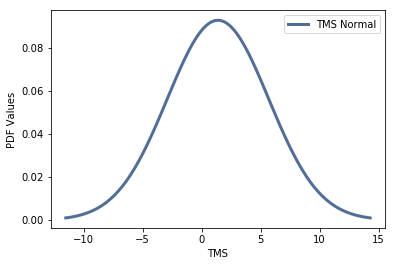

In [9]:
thinkplot.Pdf(tms_pdf,label="TMS Normal")
thinkplot.Config(xlabel="TMS",ylabel="PDF Values")

In [10]:
jnt_pdf=thinkstats2.NormalPdf(jnt_mean,jnt_std)
jnt_pdf.Density(jnt_mean+jnt_std)

0.02

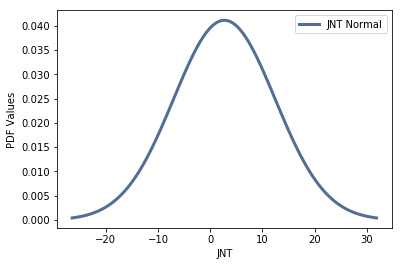

In [11]:
thinkplot.Pdf(jnt_pdf,label="JNT Normal")
thinkplot.Config(xlabel="JNT",ylabel="PDF Values")

In [12]:
#since mean and std values of tms is smaller than jnt's, 
#there fore pdf values of tms is bigger. 
#because it got values as mean and std

In [13]:
tms_median=resp["timesmar"].median()
jnt_median=resp["jintendn"].median()
pearsons_skewness_tms=3*(tms_mean-tms_median)/tms_std
pearsons_skewness_jnt=3*(jnt_mean-jnt_median)/jnt_std

In [14]:
pearsons_skewness_tms

0.27

In [15]:
pearsons_skewness_jnt

0.53

In [16]:
#since sign of value is positive it means they are rigth skewed

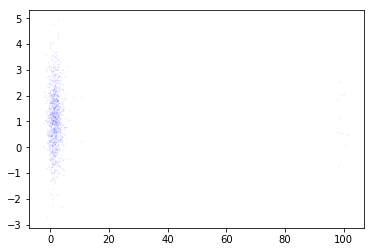

In [17]:
def normalized_plot(values, jitter=True):
    
    i = len(values)
    return np.random.normal(0, jitter, i) + values

jnt_normal=normalized_plot(resp.jintendn,1)
tms_normal=normalized_plot(resp.timesmar,1)

thinkplot.Scatter(jnt_normal,tms_normal, alpha=0.1,s=2,color='Blue')
thinkplot.Config(legend=False)

In [47]:
colours = ["black","blue","yellow"]
percents=[25,50,75]

In [66]:
timesmar.describe()

count    1074.000000
mean        1.086592
std         0.321557
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: timesmar, dtype: float64

In [61]:
jintendn.describe()

count    1074.000000
mean        2.712291
std         9.859219
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        99.000000
Name: jintendn, dtype: float64

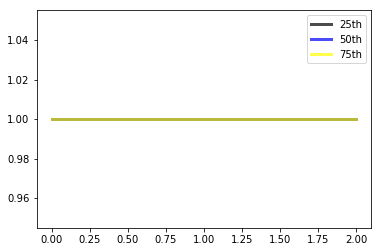

In [49]:
for i in range(len(percents)):
    label = '%dth' % percents[i]
    thinkplot.Plot(np.percentile(cleaned.timesmar, percents),label=label,color=colours[i])
    thinkplot.Config(legend=True)

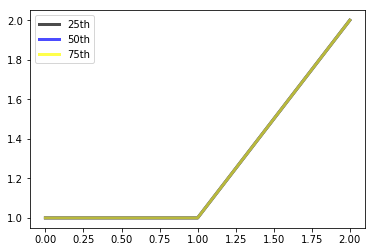

In [50]:
for i in range(len(percents)):
    label = '%dth' % percents[i]
    thinkplot.Plot(np.percentile(cleaned.jintendn, percents),label=label,color=colours[i])
    thinkplot.Config(legend=True)

In [22]:
#since timesvar values have linear line it means they seperated equally while values of jintedin have an increase in numbers

In [23]:
scipy.stats.pearsonr(jintendn, timesmar)

(-0.04, 0.23)

In [24]:
scipy.stats.spearmanr(jintendn, timesmar)

SpearmanrResult(correlation=-0.083377477903482572, pvalue=0.0062565986838944267)

In [25]:
#signs show the way of correlation in both methods, whereas minus means the opposite way

In [26]:
#the values differ becaues of pearson is a linear correlation factor, 
#while spearmen mainly focus on type of change like is it monoton or changing etc
#therefore bigger spearmen means bigger monotonus movement between values 

In [27]:
#at the end we can say timesmar values distrubted in a regular line but
#jintendn values not have direct way of distrbution possibly it have changing increase or decrease 

In [28]:
#References:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html
# lecture notes
# practice notes